In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_table("./data/val.txt", names = ["label", "title", "url", "contents"], encoding = "utf-8")
display(df.head(3))

,label,title,url,contents
0,汽车,新辉腾 ４．２ Ｖ８ ４座加长Ｉｎｄｉｖｉｄｕａｌ版２０１１款 最新报价,http://auto.data.people.com.cn/model_15782/,经销商 电话 试驾／订车Ｕ憬杭州滨江区江陵路１７８０号４００８－１１２２３３转５８６４＃保常...
1,汽车,９１８ Ｓｐｙｄｅｒ概念车,http://auto.data.people.com.cn/prdview_165423....,呼叫热线 ４００８－１００－３００ 服务邮箱 ｋｆ＠ｐｅｏｐｌｅｄａｉｌｙ．ｃｏｍ．ｃｎ
2,汽车,日内瓦亮相 ＭＩＮＩ性能版／概念车－１．６Ｔ引擎,http://auto.data.people.com.cn/news/story_5249...,ＭＩＮＩ品牌在二月曾经公布了最新的ＭＩＮＩ新概念车Ｃｌｕｂｖａｎ效果图，不过现在在日内瓦车展...


In [4]:
df_droped = df.drop(["title", "url"], axis = 1)
df_droped = df_droped.loc[:500, :]
display(df_droped.head(3))

,label,contents
0,汽车,经销商 电话 试驾／订车Ｕ憬杭州滨江区江陵路１７８０号４００８－１１２２３３转５８６４＃保常...
1,汽车,呼叫热线 ４００８－１００－３００ 服务邮箱 ｋｆ＠ｐｅｏｐｌｅｄａｉｌｙ．ｃｏｍ．ｃｎ
2,汽车,ＭＩＮＩ品牌在二月曾经公布了最新的ＭＩＮＩ新概念车Ｃｌｕｂｖａｎ效果图，不过现在在日内瓦车展...


### CSV to TEXT 

In [5]:
def csv2text():
    csv_file = input('Enter the name of your input file: ')
    txt_file = input('Enter the name of your output file: ')
    
    text_list = []
    
    with open(csv_file, "r") as my_input_file:
        for line in my_input_file:
            line = line.split(",", 2)
            text_list.append(" ".join(line))
    
    with open(txt_file, "w") as my_output_file:
        my_output_file.write("#1\n")
        my_output_file.write("double({},{})\n".format(len(text_list), 2))
        for line in text_list:
            my_output_file.write("  " + line)
        print('File Successfully written.')

#### 分词需要用list作为输入 

In [6]:
contents_list = df_droped.contents.values.tolist()
display(len(contents_list), type(contents_list), contents_list[100])

501

list

'经销商\u3000电话\u3000试驾／订车３鄙锹罚叮购沤鹌焦ひ登对面＃矗埃埃福１１２２３３转９４２６＃矗３９万Ｎ浜菏形洳区友谊大道特一号（武昌交警大队旁）＃矗埃埃福１１２２３３转７５１２＃矗４９万：？谑心虾４蟮溃保矗焙牛积＃矗埃埃福１１２２３３转９１１９＃矗５９万Ｉ蕉省临沂市沂河路与罗七路交汇处向西路南１００米远通汽车广场院内＃矗５９万Ｌ原市小店区太榆路３号４．１９万Ｌ旖蚴泻游髑解放南路６１３号三期五号＃矗３９万Ｆ蕉仁形魍饣烦ぐ蚕售基地＃矗３９万'

# 分词

### 中文分词

#### 1 jieba分词

In [7]:
import jieba

def test_jieba_cut(sentence):
    print("bef cut sentence is:  ", sentence, "\n======jieba.cut:======")
    
    sen_accurate = jieba.cut(sentence, cut_all = False)
    sen_all = jieba.cut(sentence, cut_all = True)          #精确模式会自动多出许多词语
    sen_search = jieba.cut_for_search(sentence, HMM = True)
    print("jieba.cut 的结果是一个可迭代的generator: ", sen_all, " 需要迭代读出\n")
    for line in sen_search:
        print(line)
    print("======jieba.lcut======")
    sen_lcut = jieba.lcut(sentence)
    print("jieba.lcut的返回结果是一个列表：", sen_lcut)
    print("jieba.lcut的返回结果重组为句子：", " ".join(sen_lcut))
    sen_lcut_search = jieba.lcut_for_search(sentence)
    print("jieba.lcut_for_search的返回结果重组为句子：", " ".join(sen_lcut_search))
    print("======词性标注======")
    #poss = jieba.posseg.lcut(sentence)

test_sentence = "南京市长江大桥"
test_jieba_cut(test_sentence)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\w\AppData\Local\Temp\jieba.cache


bef cut sentence is:   南京市长江大桥 
======jieba.cut:======
jieba.cut 的结果是一个可迭代的generator:  <generator object Tokenizer.cut at 0x000000000F9644F8>  需要迭代读出



Loading model cost 1.696 seconds.
Prefix dict has been built succesfully.


南京
京市
南京市
长江
大桥
长江大桥
======jieba.lcut======
jieba.lcut的返回结果是一个列表： ['南京市', '长江大桥']
jieba.lcut的返回结果重组为句子： 南京市 长江大桥
jieba.lcut_for_search的返回结果重组为句子： 南京 京市 南京市 长江 大桥 长江大桥
======词性标注======


In [9]:
import jieba

def jieba_cut(contents_list):
    cut_list = []
    for line in contents_list:
        one_list = jieba.lcut(line)
        cut_list.append(one_list)

    print("分割前后样本的类型没有变化: bef is ", type(contents_list), "|||| aft is ", type(cut_list))
    print("分割前后样本的数目没有变化: bef is ", len(contents_list), "|||| aft is", len(cut_list))
    print("分割前后每一个样本的类型变了: bef is ", type(contents_list[1]), "|||| aft is ", type(cut_list[1]))
    print("分割前后每一个样本的特征值变了: bef is ", len(contents_list[1]), "|||| aft is", len(cut_list[1]))
    print("分割前后每一个样本的内容变了：\nbef is\n", contents_list[1], "\naft is\n", cut_list[1])
    
    return cut_list

def split_sents_space(list_list):
    '''
    type(list_list) == type(list_list[0]) == list
    type(sents_cut_space) == list
    type(sents_cut_space[0]) == string
    '''
    sents_cut_space = []
    for line in list_list:
        line_tmp = ' '.join(line)
        sents_cut_space.append(line_tmp)

    print("合并前后样本的类型没有变化: bef is ", type(list_list), "|||| aft is ", type(sents_cut_space))
    print("合并前后样本的数目没有变化: bef is ", len(list_list), "|||| aft is", len(sents_cut_space))
    print("合并前后每一个样本的类型变了: bef is ", type(list_list[1]), "|||| aft is ", type(sents_cut_space[1]))
    print("合并前后每一个样本的特征值变了: bef is ", len(list_list[1]), "|||| aft is", len(sents_cut_space[1]))
    print("合并前后每一个样本的内容变了：\nbef is\n", list_list[1], "\naft is\n", sents_cut_space[1])
    return sents_cut_space

conts_cut_to_list_list = jieba_cut(contents_list)
conts_split_with_space = split_sents_space(conts_cut_to_list_list)

分割前后样本的类型没有变化: bef is  <class 'list'> |||| aft is  <class 'list'>
分割前后样本的数目没有变化: bef is  501 |||| aft is 501
分割前后每一个样本的类型变了: bef is  <class 'str'> |||| aft is  <class 'list'>
分割前后每一个样本的特征值变了: bef is  44 |||| aft is 40
分割前后每一个样本的内容变了：
bef is
 呼叫热线　４００８－１００－３００　服务邮箱　ｋｆ＠ｐｅｏｐｌｅｄａｉｌｙ．ｃｏｍ．ｃｎ 
aft is
 ['呼叫', '热线', '\u3000', '４', '０', '０', '８', '－', '１', '０', '０', '－', '３', '０', '０', '\u3000', '服务', '邮箱', '\u3000', 'ｋ', 'ｆ', '＠', 'ｐ', 'ｅ', 'ｏ', 'ｐ', 'ｌ', 'ｅ', 'ｄ', 'ａ', 'ｉ', 'ｌ', 'ｙ', '．', 'ｃ', 'ｏ', 'ｍ', '．', 'ｃ', 'ｎ']
分割前后样本的类型没有变化: bef is  <class 'list'> |||| aft is  <class 'list'>
分割前后样本的数目没有变化: bef is  501 |||| aft is 501
分割前后每一个样本的类型变了: bef is  <class 'list'> |||| aft is  <class 'str'>
分割前后每一个样本的特征值变了: bef is  40 |||| aft is 83
分割前后每一个样本的内容变了：
bef is
 ['呼叫', '热线', '\u3000', '４', '０', '０', '８', '－', '１', '０', '０', '－', '３', '０', '０', '\u3000', '服务', '邮箱', '\u3000', 'ｋ', 'ｆ', '＠', 'ｐ', 'ｅ', 'ｏ', 'ｐ', 'ｌ', 'ｅ', 'ｄ', 'ａ', 'ｉ', 'ｌ', 'ｙ', '．', 'ｃ', 'ｏ', 'ｍ', '．', 'ｃ', 'ｎ'] 
aft is
 呼叫 热线 　 ４ ０ ０

#### 中文其他分词工具

### 英文分词

In [27]:
def sentence_split(sentence): # 编写分句函数
    test_sen = []
    for s in sentence.split('.'):
        if '?' in s:
            test_sen.extend(s.split('?'))
        elif ',' in s:
            test_sen.extend(s.split(','))
        else:
            test_sen.append(s)
    return test_sen

text="text minming with python,TEXT MINING WITH PYTHON.Text Mining?With Python."
sentence_split(text)

['text minming with python',
 'TEXT MINING WITH PYTHON',
 'Text Mining',
 'With Python',
 '']

### NLTK 文本特征化中的应用

In [55]:
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer, WhitespaceTokenizer
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.tag import pos_tag
from nltk.text import Text
from collections import Counter

def cut_sent_drop_word(sentence):
    print("======pard 1 sentence cut======")
    sent_cut = sent_tokenize(sentence)
    print("sent_tokenize cut sentence: ", sent_cut)

    print("======pard 2 word cut======")
    word_cut = word_tokenize(sentence)
    print("word_tokenize: ", word_cut)
    space_cut = WhitespaceTokenizer()
    # WordPunctTokenizer将字母汉语非字母分开；BlanklineTokenizer空行为分隔符；StanfordTokenizer用PTBTokenizer分词工具进行分词；
    print("WhitespaceTokenizer 自带正则表达式分词：", space_cut.tokenize(sentence))
    pattern = r"""(?x) # 设置以编写较长的正则条件
                  (?:[A-Z]\.)+ # 缩略词
                  |\$?\d+(?:\.\d+)?%? # 货币、百分数
                  |\w+(?:[-']\w+)* # 用连字符链接的词汇
                  |\.\.\. # 省略符号
                  |(?:[.,;"'?():-_`]) # 特殊含义字符
                  """
    reg_cut = RegexpTokenizer(pattern)
    print("RegexpTokenize 自定义的正则表达式分词结果: ", reg_cut.tokenize(sentence))

    print("======part 3 drop stop words======")
    en_stop_words = stopwords.words("english")
    print("len of stop words is ", len(en_stop_words), "part of stop words is ", en_stop_words[10:15])
    word_clearn = []
    for word in space_cut.tokenize(sentence):
        if not word in en_stop_words:
            word_clearn.append(word)
    print("drop stop wrods:", word_clearn)
    print("======part 4 词干化======")
    lc = LancasterStemmer()           # PorterStemmer同理
    words = ["worked", "done", "does"]
    for word in words:
        print("bef is: ", word, "aft is: ", lc.stem(word))
    print("======part 5 词性标注======")
    print("pos_tag res is\n", pos_tag(reg_cut.tokenize(sentence)))
    print("======part 6 fixed collocation======")
    collocation = Text(space_cut.tokenize(sentence))
    print("3个固定搭配：", collocation.collocations(num = 3, window_size = 2))
    print("======part 7 counter======")
    words_counter = Counter(space_cut.tokenize(sentence))
    print("3 most common words is", words_counter.most_common(3))
    
test = "Good muffins cost $3.88\nin New York. Please buy me two of them.\nThanks"
cut_sent_drop_word(test)

======pard 1 sentence cut======
sent_tokenize cut sentence:  ['Good muffins cost $3.88\nin New York.', 'Please buy me two of them.', 'Thanks']
======pard 2 word cut======
word_tokenize:  ['Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks']
WhitespaceTokenizer 自带正则表达式分词： ['Good', 'muffins', 'cost', '$3.88', 'in', 'New', 'York.', 'Please', 'buy', 'me', 'two', 'of', 'them.', 'Thanks']
RegexpTokenize 自定义的正则表达式分词结果:  ['Good', 'muffins', 'cost', '$3.88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks']
======part 3 drop stop words======
len of stop words is  179 part of stop words is  ["you've", "you'll", "you'd", 'your', 'yours']
drop stop wrods: ['Good', 'muffins', 'cost', '$3.88', 'New', 'York.', 'Please', 'buy', 'two', 'them.', 'Thanks']
======part 4 词干化======
bef is:  worked aft is:  work
bef is:  done aft is:  don
bef is:  does aft is:  doe
======part 5 词性标注======
pos_tag res is

### drop stop word

In [11]:
stop_words=pd.read_csv("stopwords.txt",sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
# M Ｍ 由于字体不一样，同样去不掉。
stop_wordslist1 = stop_words.stopword.values.tolist()#上下两种写法都是可以的。
stop_wordslist2 = stop_words.stopword.tolist()
print(stop_wordslist1[:10], '\n', stop_wordslist1[:10])

['"', '#', '!', '$', '%', '&', "'", '(', ')', '*'] 
 ['"', '#', '!', '$', '%', '&', "'", '(', ')', '*']


In [24]:
def drop_stopwords(contents,stopwords):
    contents_clearn = []
    all_words = []
    for line in contents:
        tmp_line = []
        for word in line:
            if not word in stopwords:
                tmp_line.append(word)
                all_words.append(word)
                #print("save: ", word)
        contents_clearn.append(tmp_line)
        
    print("删除停用词前后样本的类型没有变化: bef is ", type(contents), "|||| aft is ", type(contents_clearn))
    print("删除停用词前后样本的数目没有变化: bef is ", len(contents), "|||| aft is", len(contents_clearn))
    print("删除停用词前后每一个样本的类型没有变: bef is ", type(contents[1]), "|||| aft is ", type(contents_clearn[1]))
    print("删除停用词前后每一个样本的特征值变了: bef is ", len(contents[1]), "|||| aft is", len(contents_clearn[1]))
    print("删除停用词前后每一个样本的内容变了：\nbef is\n", contents[1], "\naft is\n", contents_clearn[1])
    
    return contents_clearn, all_words

list_c = ['#', '的', '2', '3', 'jieba']
list_d = ["#", "的", "2", "3", "jieba"]  
#cut_list 是一个2维数组，只能通过两套循环进行去重，一维数组则单重循环即可。
# from nltk.corpus import stopwords
# filtered_words = [word for word in word_list if word not in stopwords.words('english')]
# 如果不用考虑词频，则可以使用下面的方法：
# list(set(cut_list) - set(stop_wordslist2))

#contents_clearn, all_words = drop_stopwords(contents_list, stop_wordslist2)           type1
#contents_clearn, all_words = drop_stopwords(conts_split_with_space, stop_wordslist2)  type3
contents_clearn, all_words = drop_stopwords(conts_cut_to_list_list, stop_wordslist2)   #type2
print(len(contents_clearn))

删除停用词前后样本的类型没有变化: bef is  <class 'list'> |||| aft is  <class 'list'>
删除停用词前后样本的数目没有变化: bef is  501 |||| aft is 501
删除停用词前后每一个样本的类型没有变: bef is  <class 'list'> |||| aft is  <class 'list'>
删除停用词前后每一个样本的特征值变了: bef is  40 |||| aft is 22
删除停用词前后每一个样本的内容变了：
bef is
 ['呼叫', '热线', '\u3000', '４', '０', '０', '８', '－', '１', '０', '０', '－', '３', '０', '０', '\u3000', '服务', '邮箱', '\u3000', 'ｋ', 'ｆ', '＠', 'ｐ', 'ｅ', 'ｏ', 'ｐ', 'ｌ', 'ｅ', 'ｄ', 'ａ', 'ｉ', 'ｌ', 'ｙ', '．', 'ｃ', 'ｏ', 'ｍ', '．', 'ｃ', 'ｎ'] 
aft is
 ['呼叫', '热线', '服务', '邮箱', 'ｋ', 'ｆ', 'ｐ', 'ｅ', 'ｏ', 'ｐ', 'ｌ', 'ｅ', 'ｄ', 'ａ', 'ｉ', 'ｌ', 'ｙ', 'ｃ', 'ｏ', 'ｍ', 'ｃ', 'ｎ']
501


In [412]:
index = 400
contents = "".join(contents_clearn[index])
print("bef join\n", contents_clearn[index], "aft join\n", contents)

bef join
 ['花冠', '丰田', '汽车', '旗下', '产品', '国产', '花冠', '第九代', '产品', '值得', '称道', 'ｉ', '发动机', '这是', '丰田', '国产', '车型', '中', '首款', '采用', '发动机', '车型', '花冠', '不可不', '谓', '经典', '车型', '改常新', '经久不衰', '无论是', '外形', '操纵', '舒适性', '花冠', '不偏不倚', '花冠', '身为', '家庭', '用车', '保养', '价格', '我来', '介绍', 'Ｎ', '颐且', '砸', '涣', '舅郊页', '嫡常', '行驶', '一年', '平均', '行驶', '里程', '万公里', '计算', '时间', '行驶', '万公里', '短时间', '车辆', '质量', '店', '检测', '日常', '保养', '进', '店', '保养', '公里', '保养', '崽', '锘', 'ü', '诒', 'Ｑ', '费用', '崽', '锘', 'ü', '诠', 'な', '狈', '延谬', '捎', '诒', 'Ｑ', '工时费', '每家', '经销商', '情况', '而定', '每家', '工时费', '工时费', '北京', '北苑', '丰田', '汽车', '销售', '服务', '有限公司', '提供', 'Ｃ', '扛', '簦', '担埃埃', '肮里', '保养', '项目', '崽', '锘', 'ü', '诿', '扛', '簦', '担埃埃', '肮里', '更换', '项目', '机油', '机油', '滤清器', '机油', '店', '推荐', 'Ｍ', 'Ｗ', '级', '原装机', '油', '级别', '润滑油', '刻以', '日常', '从图', '中', '得知', '花冠', '更换', '机油', '滤清器', '中国', '生产', '价格', '原厂', '价', '便宜', '┍', '痹', '贩', '崽', '锲车', '销售', '服务', '有限公司'] aft join
 花冠丰田汽车旗下产品国产花冠第九代产品值得称道ｉ发动机这是丰田国产车型中首款采用发动机车型花冠不可不谓经典车型改常

##  jieba analysis ##
提取关键字，输入是一个文本，不是list。

In [413]:
import jieba.analyse

print("   ".join(jieba.analyse.extract_tags(contents, topK = 5, withWeight = False))) #with 是小写

花冠   保养   机油   工时费   丰田


## gensim  构建文档词频矩阵

Dictionary 是 dictionary 模块下定义的类，可以实现词汇和词汇 id 之间的映射，即词典；输入是list,可以迭代的string

dict.doc2bow() 可以将文本词汇集合转换为词袋模型表示形式，以列表形式返回，列表元素为 (词汇 id , 词频)的元组。

可以将分词后的corpus输入，对于英文可以使用下面做简单分词：

texts = [[word for word in document.lower().split()] for document in corpus]

在 filter_extremes 方法中可以定义更加复杂的过滤方式，其调用方式为：

====================================================================================================

dict.filter_extremes(no_below=5, no_above=0.5, keep_n=100000)。

no_below：若包含某词汇的文档少于 no_below 个，该词汇将被删除

no_above：若包含某词汇的文档在所有文档中占比大于 no_above ，该词汇将被删除

keep_n：经过参数 no_below 和 no_above 的过滤后，保留频率最高的前 keep_n 个词汇，取值为 None 时，表示保留全部词汇

====================================================================================================

dict.merge_with(new_dictionary) 方法用于字典合并

dict.add_documents(documents, prune_at=2000000) 方法可以用新的文档内容更新现有的词典，同样，新的文档形式需为词汇列表

============================================================================
“词袋模型”一词源自“Bag of words”，简称 BOW，词袋模型对于词汇的独立性假设，简化了文本数据结构化处理过程中的计算，被广泛采用，但是另一方面，这种假设忽略了词汇之间的顺序和依赖关系，降低了模型对文本的代表性。


In [53]:
from gensim import corpora, models, similarities

def get_lda(_2D_array):
    dict_all = corpora.Dictionary(_2D_array)
    corpus_vec = [dict_all.doc2bow(sentence ) for sentence in _2D_array]# doc2bow 将每一句中的词用之前转换好的一个数字代替；
    #print(dict_all.token2id)
    print("input shape: ", len(_2D_array), ", type: ", type(_2D_array), "    out shape: ", len(corpus_vec), ", type: ", type(corpus_vec))
    print("_2D_array[1] is: \n", _2D_array[1], "\ncorpus_vec[1] is: \n", corpus_vec[1])  #输入的list已经做过分词处理，所以含有词语；
    print("key is: \n", dict_all.keys, "\nvalues is: \n", dict_all.values, "\n key  and values is: ", dict_all.items())
    
    lda = models.ldamodel.LdaModel(corpus = corpus_vec, id2word = dict_all, num_topics = 5)
    # corpus 将被训练的文档语料； num_topics：需要提取的潜在主题数；id2word：用于设置构建模型的词典
    return lda

lda = get_lda(contents_clearn)

input shape:  501 , type:  <class 'list'>     out shape:  501 , type:  <class 'list'>
_2D_array[1] is: 
 ['呼叫', '热线', '服务', '邮箱', 'ｋ', 'ｆ', 'ｐ', 'ｅ', 'ｏ', 'ｐ', 'ｌ', 'ｅ', 'ｄ', 'ａ', 'ｉ', 'ｌ', 'ｙ', 'ｃ', 'ｏ', 'ｍ', 'ｃ', 'ｎ'] 
corpus_vec[1] is: 
 [(196, 1), (197, 1), (198, 1), (199, 1), (200, 1), (201, 2), (202, 1), (203, 2), (204, 1), (205, 1), (206, 1), (207, 2), (208, 1), (209, 1), (210, 2), (211, 2), (212, 1)]
key is: 
 <bound method Dictionary.keys of <gensim.corpora.dictionary.Dictionary object at 0x000000000F7843C8>> 
values is: 
 <bound method Mapping.values of <gensim.corpora.dictionary.Dictionary object at 0x000000000F7843C8>> key  and values is:  ItemsView(<gensim.corpora.dictionary.Dictionary object at 0x000000000F7843C8>)


### gensim LDA分析

### http://cloga.info/python/2014/01/27/corpora_vector_space
### https://blog.csdn.net/sinat_26917383/article/details/79357700  lda的详细解释

In [641]:
def show_topics(lda_get):
    print("本文分为如下几个主题：\n", lda_get.get_topics())
    print("第0篇文章的前10个主题词的vec是：\n",lda_get.get_topic_terms(0, topn = 10))
    print("print_topic 第0篇文章的前10个主题词是：\n",lda_get.print_topic(0, topn = 10))
    print("show_topic 第0篇文章的前10个主题词是：\n",lda_get.show_topic(0, topn = 10))
    print("print_topics 前5个主题的前5个关键词分别是：\n",lda_get.print_topics(num_topics=5, num_words=5))
    print("show_topics 前5个主题的前5个关键词分别是：\n",lda_get.show_topics(num_topics=5, num_words=5))
    print("第0篇文章的主题属于5个主题的可能性分别是： \n", lda_get.get_document_topics(corpus_vec[0]))
    print("word id = 0 的单词最有大于50%的可能性对应与主题是：\n", lda_get.get_term_topics(971, minimum_probability = 0))
    #top_topics = lda_get.top_topics(contents_clearn)
    #tc = sum([t[1] for t in top_topics])
    #print("\ntop_topics：%.4f.\n" % (tc))

show_topics(lda)

本文分为如下几个主题：
 [[1.60408072e-05 5.71913042e-05 1.68139988e-03 ... 2.90346561e-05
  3.22550768e-05 2.97608403e-05]
 [2.03254313e-05 6.60133228e-05 2.22597294e-03 ... 1.17311456e-05
  1.17311420e-05 1.17318241e-05]
 [3.64733423e-05 6.52735034e-05 2.12635496e-03 ... 2.68772528e-05
  2.40390018e-05 2.93421836e-05]
 [8.59716019e-05 5.50350378e-05 3.56524368e-03 ... 1.19580845e-05
  1.19576925e-05 1.19603865e-05]
 [1.79417275e-05 4.29706743e-05 9.26067762e-04 ... 3.54519652e-05
  3.38888894e-05 3.17025078e-05]]
第0篇文章的前10个主题词的vec是：
 [(208, 0.014023398), (7, 0.012743309), (171, 0.010709676), (284, 0.008903683), (43, 0.0065951617), (203, 0.005623371), (210, 0.005255806), (105, 0.005173175), (1022, 0.00498112), (200, 0.004951728)]
print_topic 第0篇文章的前10个主题词是：
 0.014*"ｍ" + 0.013*"万" + 0.011*"转" + 0.009*"车型" + 0.007*"号" + 0.006*"ｅ" + 0.005*"ｏ" + 0.005*"汽车" + 0.005*"万元" + 0.005*"ａ"
show_topic 第0篇文章的前10个主题词是：
 [('ｍ', 0.014023398), ('万', 0.012743309), ('转', 0.010709676), ('车型', 0.008903683), ('号', 0.006

In [599]:
for topic in lda.print_topics(num_topics=20, num_words=5):   #print_topics 复数形式。
    print(topic[1])

0.018*"报价" + 0.011*"网上" + 0.011*"ｍ" + 0.010*"车市" + 0.010*"Ｍ"
0.041*"万" + 0.022*"Ｍ" + 0.015*"号" + 0.014*"模海" + 0.014*"Ｋ"
0.039*"万" + 0.027*"转" + 0.019*"号" + 0.014*"矗埃埃福" + 0.010*"汽车"
0.047*"万" + 0.018*"转" + 0.016*"号" + 0.010*"ｍ" + 0.008*"矗埃埃福"
0.023*"万" + 0.010*"号" + 0.010*"Ｍ" + 0.010*"ｏ" + 0.010*"转"
0.045*"万" + 0.026*"号" + 0.013*"转" + 0.010*"矗埃埃福" + 0.006*"＂"
0.036*"万" + 0.022*"转" + 0.015*"号" + 0.014*"矗埃埃福" + 0.010*"矗"
0.031*"万" + 0.030*"号" + 0.029*"转" + 0.011*"矗埃埃福" + 0.006*"路"
0.017*"万" + 0.015*"号" + 0.008*"＂" + 0.008*"转" + 0.006*"车型"
0.016*"万元" + 0.014*"万" + 0.013*"号" + 0.013*"转" + 0.011*"矗埃埃福"
0.013*"车型" + 0.012*"ｍ" + 0.011*"ａ" + 0.011*"ｒ" + 0.010*"ｅ"
0.015*"车型" + 0.008*"ｍ" + 0.007*"发动机" + 0.006*"Ｂ" + 0.006*"设计"
0.025*"转" + 0.015*"万" + 0.010*"号" + 0.009*"万元" + 0.007*"矗埃埃福"
0.011*"车型" + 0.009*"＂" + 0.009*"设计" + 0.008*"Ｕ" + 0.006*"汽车"
0.011*"＂" + 0.009*"Ｃ" + 0.007*"车型" + 0.007*"Ｂ" + 0.006*"Ｎ"
0.012*"ｍ" + 0.008*"车型" + 0.008*"ｅ" + 0.007*"Ｃ" + 0.007*"ｏ"
0.024*"万" + 0.016*"号" + 0.010*"Ｋ"

# 文本数据结构化处理 

“文档-词项矩阵”一词源自“Document-Term Matrix”，简称 DTM，DTM 矩阵转置后即为 TDM。 矩阵的行代表文档，列代表词汇，矩阵元素即为某一文档中某一维度的词汇出现的次数。

## 文本数据结构化处理一：文档--词项矩阵

## CountVectorizer

构建的是文档-词频矩阵

https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

def count_vectorizer(corpus):
    cv = CountVectorizer(stop_words = stop_wordslist1, lowercase=False)   #可以设置停用词
    x = cv.fit_transform(corpus)
    #print("input type(corpus) is:", type(corpus), "corpus.shape() is: ", corpus.shape, "output is type is：", type(x),"x.shape() is: ", x.shape) #好像一部分词被省略了。
    print("input type(corpus) is:", type(corpus), "corpus.shape() is: ", len(corpus), "output is type is：", type(x),"x.shape() is: ", x.shape) 
    #print("input corpus[1] is: \n", corpus, "\noutput x[1] is: \n", x)
    #print("被转换的字符是: \n", cv.get_feature_names(), "对应关系是: \n", x.toarray())
    print("可以用vocabulary_ 属性查看某个词汇对应的ID: ", cv.vocabulary_.get("经销商"))
    #print("每个文档中非零词向量的的词项: ", cv.inverse_transform(x))

    x = x.toarray()
    print("合并前后样本的类型变了: bef is ", type(corpus), "|||| aft is ", type(x))
    print("合并前后样本的数目没有变化: bef is ", len(corpus), "|||| aft is", x.shape)
    print("合并前后每一个样本的类型变了: bef is ", type(corpus[1]), "|||| aft is ", type(x[1]))
    print("合并前后每一个样本的特征值变了: bef is ", len(corpus[1]), "|||| aft is", (x[1]).shape)
    print("合并前后每一个样本的内容变了：\nbef is\n", corpus[1], "\naft is\n", x[1])
    
    return x

#count_vectorizer(df_droped.contents)  #将整个一条句子传入提取特征；x.shape() is:  (501, 13054),虽然该函数也可以分词，但是结果没有jieba好，所以用分词后的传入更好
#count_vectorizer(contents_list)        #contents_list  = df_droped.contents.values.toarray(), list[string]类型，x.shape() is:  (501, 13054)
#count_vectorizer(conts_cut_to_list_list) #list[list]这种输入是不对的

#没有添加停用词表 stop_words = stop_wordslist1,  的时候特征值是不一样的，
#添加的情况下两者是相同的 x.shape() is:  (501, 9886)。也就是说在这里过滤停用词和专门用一个恶函数去过滤效果一样。
#x_space_cv = count_vectorizer(conts_split_with_space)#x.shape() is:  (501, 10449)
#x_space_cv = count_vectorizer(split_sents_space(contents_clearn))   # x.shape() is:  (501, 9886)

#最好的做法是用jieba进行分割，分割后不用过滤，直接拿到这里进行特征化
x_space_cv = count_vectorizer(conts_split_with_space)
'''
#contents_clearn, all_words = drop_stopwords(contents_list, stop_wordslist2)           type1
#contents_clearn, all_words = drop_stopwords(conts_split_with_space, stop_wordslist2)  type3
contents_clearn, all_words = drop_stopwords(conts_cut_to_list_list, stop_wordslist2)   #type2
'''
print("type(contents_list)", type(contents_list), "type(contents_list[1])", type(contents_list[0:2]))

input type(corpus) is: <class 'list'> corpus.shape() is:  501 output is type is： <class 'scipy.sparse.csr.csr_matrix'> x.shape() is:  (501, 9886)
可以用vocabulary_ 属性查看某个词汇对应的ID:  7315
合并前后样本的类型变了: bef is  <class 'list'> |||| aft is  <class 'numpy.ndarray'>
合并前后样本的数目没有变化: bef is  501 |||| aft is (501, 9886)
合并前后每一个样本的类型变了: bef is  <class 'str'> |||| aft is  <class 'numpy.ndarray'>
合并前后每一个样本的特征值变了: bef is  83 |||| aft is (9886,)
合并前后每一个样本的内容变了：
bef is
 呼叫 热线 　 ４ ０ ０ ８ － １ ０ ０ － ３ ０ ０ 　 服务 邮箱 　 ｋ ｆ ＠ ｐ ｅ ｏ ｐ ｌ ｅ ｄ ａ ｉ ｌ ｙ ． ｃ ｏ ｍ ． ｃ ｎ 
aft is
 [0 0 0 ... 0 0 0]
type(contents_list) <class 'list'> type(contents_list[1]) <class 'list'>


由于 contents_clearn 中每一行的字符是用逗号隔开的，而 CountVectorizer 要求输入的是 string 类型输入，所以要对 contents_clearn进行转换

df 每一列的数据都是一维的，one-hot编码要转换成2维的：df.a.values.reshape(-1, 1)
### y 输入只能是单个数值吗

In [502]:
from sklearn.preprocessing import OneHotEncoder
all_label = df_train_label.label.unique()
encoder = OneHotEncoder()
print(df_train_label.label.shape, type(df_train_label.label))
y = encoder.fit_transform((df_train_label.label.values).reshape(-1, 1)).toarray()
print(y)

(501,) <class 'pandas.core.series.Series'>
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [595]:
#print(df_train_label.label.values.reshape(-1, 1))
labels = df_train_label.label.values.reshape(-1, 1)
dict_all = corpora.Dictionary(labels)
#print(dct.token2id)
corpus_vec = [dict_all.doc2bow(sentence ) for sentence in labels]# doc2bow 将每一句中的词用之前转换好的一个数字代替；
#print(corpus_vec)

#### HashingVectorizer

CountVectorizer 类构建文档词频矩阵时，需要调用两次文档集合，一次用于创建词典，一次用于创建每个文档对应的词频向量，两次调用会导致内存消耗较大。HashingVectorizer类通过哈希（hashing） 技巧，不创建字典，有效的缓解了这一问题

### DictVectorizer

例如文档“text mining text analysis”，可以存储为 {'text': 2, 'mining': 1, 'analysis': 1}

DictVectorizer 类可以将字典形式的特征表示转换为 Numpy 数组形式，对于分类变量采用“one-hot coding”表示

## 文档结构化处理方式二: 词袋特征提取

有待完善

In [111]:
def bag_of_words(corpus, labels):
    corpus_label = []
    for line in corpus:
        corpus_label.append(dict([(word, True) for word in line]))
    
    print(bag_list)

list_ = [['bag', 'of', 'words'], ['bag', 'a', 'words']]
dict_ = bag_of_words(list_)

'''
# 把训练集给做成标准形式
training_data = [[preprocess(s1), 'pos'],
[preprocess(s2), 'pos'],
[preprocess(s3), 'neg'],
[preprocess(s4), 'neg']]
# 喂给model吃
model = NaiveBayesClassifier.train(training_data)
# 打出结果
print(model.classify(preprocess('this is a good book')))

当然啦, 我们以后可以升级这个⽅程, 让它带有更加⽜逼的fval, ⽐如 word2vec
'''

[{'bag': True, 'of': True, 'words': True}, {'bag': True, 'a': True, 'words': True}]


## 文档结构化处理方式二： TF-IDF 处理

词频-逆向文档频率”一词源自“Term Frequency–Inverse Document Frequency”，简称 TF-IDF。 对某个文档最有代表性的词汇或者说对区别文档最有意义的词汇应该是那些在某个文档中出现频率高，而在整个文档集合的其他文档中出现频率少的词汇。常用的计算方式就是在文档词项矩阵（tf）的基础上进行权数（idf） 调整。 

TF(t) = (t出现在⽂档中的次数) / (⽂档中的term总数).IDF(t) = log_e(⽂档总数 / 含有t的⽂档总数)

假设现在有一个包含 1000 个文档的文档集合，其中包括文档：[经济，发展，新常态，研究，……]，该文档总词汇数是 100，“经济”这个词汇出现了 4次，则“经济”一词的词频（TF） 为 4/100 = 0.04，如果在 1000 个文档中有 100 个文档出现过“经济”一词，则逆向文档频率（IDF） 为 log(1000/100) = 1，那么在 TF-IDF 矩阵中，该文档中“经济”一词对应的权数应为 0.04 * 1 = 0.04

CountVectorizer 类可以将文档集合转换为文档词频矩阵

sklearn.feature_extraction.text.TfidfTransformer 类可以将词频矩阵转换为标准化的 TF 或 TF-IDF 矩阵

而 TfidfVectorizer 类将这两个过程合并在一起，即可将原始文本数据直接转换为 TF-IDF 矩阵。

get_feature_names 方法可以获得所有特征项，即文档-词频矩阵列对应的所有词汇

==============================

gensim 库 models 包中的 tfidfmodel 模块下定义了构建词频-逆向文档频率矩阵的类——TfidfModel

创建词典
dictionary = corpora.Dictionary(texts)
创建文档词频向量
corpus = [dictionary.doc2bow(text) for text in texts]
计算 tf-idf 值
tfidf_model = models.TfidfModel(corpus)
corpus_tfidf = tfidf_model[corpus]
for i in corpus_tfidf:
    print i

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_trans(sents):
    tfidf = TfidfVectorizer(analyzer = 'word', max_features = 4000, lowercase = False)
    print(tfidf)
    sents_tfidf = tfidf.fit_transform(sents)
    #sents_tfidf = sents_tfidf.toarray()
    print("合并前后样本的类型变了: bef is ", type(sents), "|||| aft is ", type(sents_tfidf))
    print("合并前后样本的数目没有变化: bef is ", len(sents), "|||| aft is", sents_tfidf.shape)
    print("合并前后每一个样本的类型变了: bef is ", type(sents[1]), "|||| aft is ", type(sents_tfidf[1]))
    print("合并前后每一个样本的特征值变了: bef is ", len(sents[1]), "|||| aft is", (sents_tfidf[1]).shape)
    print("合并前后每一个样本的内容变了：\nbef is\n", sents[1], "\naft is\n", sents_tfidf[1])
    
    return sents_tfidf

sents_tfidf = tfidf_trans(conts_split_with_space)

#bayes_clf(sents_tfidf, df_train_label['label'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=1.0, max_features=4000, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)
合并前后样本的类型变了: bef is  <class 'list'> |||| aft is  <class 'scipy.sparse.csr.csr_matrix'>
合并前后样本的数目没有变化: bef is  501 |||| aft is (501, 4000)
合并前后每一个样本的类型变了: bef is  <class 'str'> |||| aft is  <class 'scipy.sparse.csr.csr_matrix'>
合并前后每一个样本的特征值变了: bef is  83 |||| aft is (1, 4000)
合并前后每一个样本的内容变了：
bef is
 呼叫 热线 　 ４ ０ ０ ８ － １ ０ ０ － ３ ０ ０ 　 服务 邮箱 　 ｋ ｆ ＠ ｐ ｅ ｏ ｐ ｌ ｅ ｄ ａ ｉ ｌ ｙ ． ｃ ｏ ｍ ． ｃ ｎ 
aft is
   (0, 1086)	0.5199578522870563
  (0, 2607)	0.5001209662147553
  (0, 2168)	0.4510446677578356
  (0, 3696)	0.5254346378805599


## 文本结构化处理三：词向量

### word2vec 

### gensim.models.Word2Vec

In [4]:
import nltk
from nltk.corpus import brown

def get_data():
    sents = [[j.lower() for j in i] for i in brown.sents()]
    print("len(sents): ", len(sents), "type(sents): ", type(sents), "type(sents[0])", type(sents[0]))
    return sents

test_sents = get_data()
# 由于 contents_list 是一个一维数组，Word2Vec不知怎样将其分开，所以不适合；
# sents的构造过程以及type(sents[0])的类型显示其是一个二维数组；
#print("len(contents_list): ", len(contents_list), "type(contents_list): ", type(contents_list), "type(contents_list[0])", type(contents_list[0]))

len(sents):  57340 type(sents):  <class 'list'> type(sents[0]) <class 'list'>


In [7]:
import gensim

def word_to_vect(sentence):
    w2v_model = gensim.models.Word2Vec(sentence, size = 100, window = 5, min_count = 3)
    #w2v_model.save("./data/model")  没有保存成功
    #w2v_model.load("./data/model")
    #model = Word2Vec.load_word2vec_format('google_news.txt', binary=False) # C text format
    #model = Word2Vec.load_word2vec_format('google_news.bin', binary=True) # C binary format
    #print("english 转换之后测词向量是: \n", w2v_model.wv["english"])
    dont_match = w2v_model.doesnt_match(['breakfast', 'cereal', 'dinner', 'lunch'])
    print("从训练集中推算，['breakfast', 'cereal', 'dinner', 'lunch']这几个单词中与其他类型不一样的是: ", dont_match)
    most_similar = w2v_model.most_similar(positive=["woman","king"],negative=["man"],topn=5)
    print("从训练集中推算，语义中包含woman、king但是不包含man 的5个词是：\n", most_similar)
    similarity = w2v_model.n_similarity(['old', 'lady'], ['young', 'boy'])
    print("从训练集中推算，'old', 'lady'，'young', 'boy'的相似度是：\n", similarity)
    print("从训练集中推算, 与nice最相近的5个词语是: ", w2v_model.similar_by_word('nice',topn=5))
    print("两个词的相似度是:", w2v_model.similarity('pleasure', 'dog'))

word_to_vect(test_sents)

从训练集中推算，['breakfast', 'cereal', 'dinner', 'lunch']这几个单词中与其他类型不一样的是:  cereal
从训练集中推算，woman king 最接近，与 man 最远离的5个词是：
 [('princeton', 0.9540836811065674), ('roman', 0.9502651691436768), ('roots', 0.9492810964584351), ('1952', 0.9482792615890503), ('restored', 0.9477081298828125)]
从训练集中推算，'old', 'lady'，'young', 'boy'的相似度是：
 0.9422655547655826
从训练集中推算, 与nice最相近的5个词语是:  [('beautiful', 0.9509816765785217), ('knack', 0.9303882718086243), ('fine', 0.9286350607872009), ('blind', 0.9273473024368286), ('surely', 0.921423077583313)]
两个词的相似度是: 0.9008115260957745


D:\Users\w\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `doesnt_match` (Method will be removed in 4.0.0, use self.wv.doesnt_match() instead).
  # Remove the CWD from sys.path while we load stuff.
D:\Users\w\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if sys.path[0] == '':
D:\Users\w\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `n_similarity` (Method will be removed in 4.0.0, use self.wv.n_similarity() instead).
  
D:\Users\w\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:16: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  app.launch_new_instance()
D:\Users\w\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: 

## mapping

### 有没有更好的做映射的方法？ 

In [86]:

feature_label = pd.DataFrame(np.random.randn(501, 40000))

label_mapping = {"汽车": 1, "财经": 2, "科技": 3, "健康": 4, "体育":5, "教育": 6,"文化": 7,"军事": 8,"娱乐": 9,"时尚": 0}
feature_label['y_train_test'] = df_droped['label'].map(label_mapping)

#df_feature_label['x_train_test'] = x_space_cv
#df_feature_label['x_train_test'] = sents_tfidf
print(feature_label.head(10), "\n", feature_label.tail(10))

'''
aaa = pd.DataFrame()

label_mapping = {"汽车": 1, "财经": 2, "科技": 3, "健康": 4, "体育":5, "教育": 6,"文化": 7,"军事": 8,"娱乐": 9,"时尚": 0}
aaa['y_train_test'] = df_droped['label'].map(label_mapping)

aaa['x_train_test'] = conts_split_with_space

print(aaa.head(10), "\n", aaa.tail(10))
'''

          0         1         2         3         4         5         6  \
0  0.663096  0.402282 -0.575929  0.028209 -0.840693  0.237689 -1.988995   
1 -0.473551  1.181268  0.410701  0.597198  1.065039 -0.224096 -0.493422   
2  2.108808 -0.536339 -0.554278  0.016049 -0.852961 -0.873650 -0.499563   
3 -0.256091 -1.281063  0.912140  1.988719 -0.903191 -1.155541 -0.320411   
4 -1.663813 -2.940368  0.648992 -2.809625  1.295922 -0.481740  1.032881   
5 -0.947690  0.013068  0.450368  1.222904  0.774645  1.419684  1.212414   
6  1.204485 -0.790305  1.054092 -2.176963 -0.627976 -1.095955  0.809892   
7 -0.045348 -0.448982  1.172985  1.169629 -0.442228 -0.614139  0.613977   
8 -0.470794 -0.584598  0.006238 -0.637428  0.079763 -0.605732 -0.041770   
9 -0.294400  0.674912  0.912868  0.507703  0.691031  0.522481  0.048208   

          7         8         9      ...          39991     39992     39993  \
0  2.309912 -0.255884  1.412057      ...      -1.385759  1.030886 -0.498365   
1 -0.416535 -0.1

'\naaa = pd.DataFrame()\n\nlabel_mapping = {"汽车": 1, "财经": 2, "科技": 3, "健康": 4, "体育":5, "教育": 6,"文化": 7,"军事": 8,"娱乐": 9,"时尚": 0}\naaa[\'y_train_test\'] = df_droped[\'label\'].map(label_mapping)\n\naaa[\'x_train_test\'] = conts_split_with_space\n\nprint(aaa.head(10), "\n", aaa.tail(10))\n'

## train test split function

input 可以为 lists, numpy arrays, scipy-sparse matrices or pandas dataframes.


判断类型

https://stackoverflow.com/questions/1549801/what-are-the-differences-between-type-and-isinstance

https://docs.quantifiedcode.com/python-anti-patterns/readability/do_not_compare_types_use_isinstance.html

In [59]:
from sklearn.model_selection import train_test_split
def train_test_split_func(x, y, testsize = 0.25):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = testsize)
    if(type(x) == 'scipy.sparse.csr.csr_matrix'):
        print(type(x_test), x_train.get_shape(), type(y_test), len(y_test))
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = train_test_split_func(df_feature_label['x_train_test'], df_feature_label['y_train_test'])

# 文本分类、聚类

## 分类


### bayes

input 可以是<class 'scipy.sparse.csr.csr_matrix'>类型的也可以是 <class 'numpy.ndarray'> 类型的；

In [95]:
from sklearn.naive_bayes import MultinomialNB

def bayes_clf(x, y):
    clf = MultinomialNB()
    x_train, x_test, y_train, y_test = train_test_split_func(x, y)
    #x_train.shape
    clf.fit(x_train, y_train)
    print("平均准确率为：", clf.score(x_test, y_test))
    print("测试集样本属于各个类别的概率为：\n", clf.predict_proba(x_test))

x_train_test = x_space_cv   #counter vector 向量化得到的将结果
x_train_test = sents_tfidf  #tfidf vector 得到的结果
bayes_clf(x_train_test, df_feature_label['y_train_test'])

平均准确率为： 1.0
测试集样本属于各个类别的概率为：
 [[9.97333333e-01 2.66666667e-03]
 [9.99547635e-01 4.52364593e-04]
 [9.99983566e-01 1.64339344e-05]
 [9.99756025e-01 2.43975473e-04]
 [9.98809312e-01 1.19068751e-03]
 [9.99928687e-01 7.13127643e-05]
 [9.99694631e-01 3.05368581e-04]
 [9.99626159e-01 3.73841069e-04]
 [9.99942203e-01 5.77971467e-05]
 [9.99639170e-01 3.60830300e-04]
 [9.99956016e-01 4.39843354e-05]
 [9.99887820e-01 1.12179991e-04]
 [9.98634335e-01 1.36566530e-03]
 [9.98766488e-01 1.23351195e-03]
 [9.99983566e-01 1.64339344e-05]
 [9.99160573e-01 8.39426841e-04]
 [9.99870658e-01 1.29342126e-04]
 [9.99825469e-01 1.74531089e-04]
 [9.97333333e-01 2.66666667e-03]
 [9.98784207e-01 1.21579258e-03]
 [9.99877116e-01 1.22883543e-04]
 [9.97333333e-01 2.66666667e-03]
 [9.99623529e-01 3.76470845e-04]
 [9.99950560e-01 4.94398619e-05]
 [9.99983566e-01 1.64339344e-05]
 [9.99942203e-01 5.77971467e-05]
 [9.99045056e-01 9.54944467e-04]
 [9.99909945e-01 9.00545394e-05]
 [9.98870487e-01 1.12951264e-03]
 [9.99983566e

### K-最邻近分类器（KNN）

input 可以是<class 'scipy.sparse.csr.csr_matrix'>类型的也可以是 <class 'numpy.ndarray'> 类型的；

In [101]:
from sklearn.neighbors import KNeighborsClassifier

def knn_clf(x, y):
    clf = KNeighborsClassifier(n_neighbors=2)
    x_train, x_test, y_train, y_test = train_test_split_func(x, y)
    #x_train.shape
    clf.fit(x_train, y_train)
    print("平均准确率为：", clf.score(x_test, y_test))
    #print("测试集样本属于各个类别的概率为：\n", clf.predict_proba(x_test))

#x_train_test = x_space_cv   #counter vector 向量化得到的将结果
x_train_test = sents_tfidf  #tfidf vector 得到的结果
knn_clf(x_train_test, df_feature_label['y_train_test'])
#clf_knn.predict
#clf_knn.predict_proba

平均准确率为： 1.0


### 支持向量机（SVM）

In [106]:
from sklearn.svm import SVC

def svc_clf(x, y):
    clf = SVC()
    x_train, x_test, y_train, y_test = train_test_split_func(x, y)
    clf.fit(x_train, y_train)
    clf.predict(x_test)
    
#x_train_test = x_space_cv   #counter vector 向量化得到的将结果
x_train_test = sents_tfidf  #tfidf vector 得到的结果
#svc_clf(x_train_test, df_feature_label['y_train_test'])

### 决策树（Decision tree）

### 神经网络（Neural network） 

### 使用 NLTK 进行文本分类

## 聚类

In [116]:
from sklearn.cluster import KMeans

def km_cluster(x):
    km = KMeans(n_clusters=2)
    km.fit(x)
    km.fit_predict(x)
    km.cluster_centers_
    km.inertia_
    
#x_train_test = x_space_cv   #counter vector 向量化得到的将结果
x_train_test = sents_tfidf  #tfidf vector 得到的结果
km_cluster(x_train_test)

In [122]:
import nltk
from nltk.cluster import KMeansClusterer

def nltk_km(x):
    km=KMeansClusterer(num_means=3,distance=nltk.cluster.util.cosine_distance)
    km.cluster(x)
    for i in x:
        print(i, km.classify(i))
        
nltk_km(sents_tfidf)

TypeError: sparse matrix length is ambiguous; use getnnz() or shape[0]

## 评价标准

In [124]:
from sklearn import metrics

labels_true = [0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2]

metrics.adjusted_rand_score(labels_true, labels_pred)

0.5454545454545454

In [125]:
labels_true = [0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2]
metrics.normalized_mutual_info_score(labels_true, labels_pred)

d:\program files\python37\lib\site-packages\sklearn\metrics\cluster\supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


0.7987327627644502

In [126]:
labels_true = [0, 0, 1, 1, 1]
labels_pred = [0, 0, 1, 1, 2]
metrics.homogeneity_score(labels_true, labels_pred)
metrics.completeness_score(labels_true, labels_pred)

0.6379740263133313

In [127]:
X = np.array(([ 5, 3, 1, 0],
[ 4, 3, 1, 1],
[ -4, 3, 1, 0],
[ -4, 3, 1, 2],
[ -5, 3, 1, 2]))
y = np.array((0,0,1,1,1))
metrics.silhouette_score(X, y, metric='euclidean')

0.818453750034078

# 文本可视化

In [410]:
df_allwords = pd.DataFrame({"all_words": all_words})
words_count = df_allwords.groupby(by = "all_words")["all_words"].agg({"count":np.size})      #为啥要用["all_words"]
words_count = words_count.reset_index().sort_values(by =["count"], ascending=False)
words_count.head(10)

d:\program files\python37\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,all_words,count
301,万,1940
2691,号,1026
10336,转,1023
11992,ｍ,690
10284,车型,679
8048,矗埃埃福,558
6729,汽车,440
11957,＂,435
11968,Ｍ,401
11959,Ｃ,385


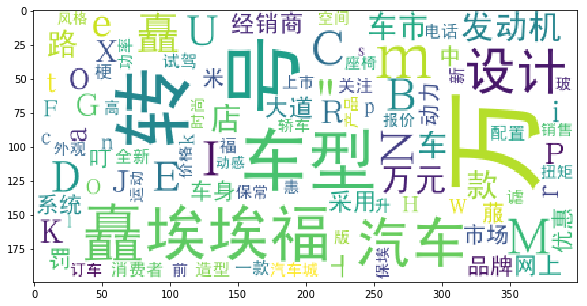

In [411]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

wordcloud=WordCloud(font_path="./data/simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)